In [1]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.7 MB/s eta 0:00:00


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

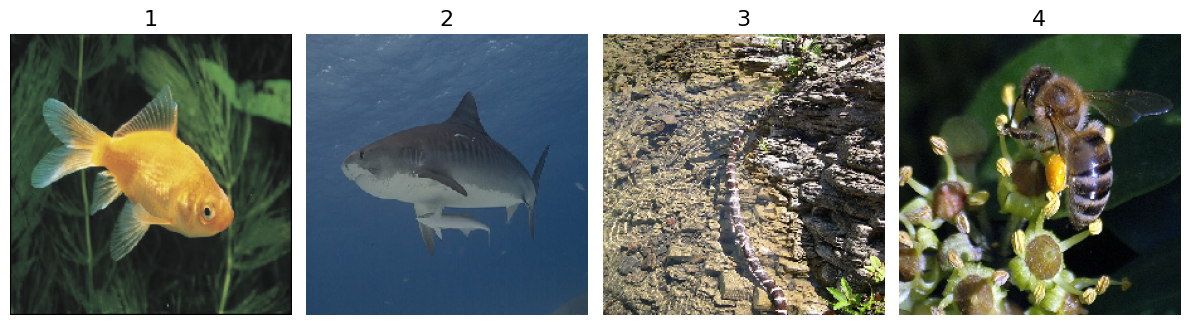

In [29]:
model = Model(weights='imagenet', include_top=True)# Загружаем предобученную модель с весами ImageNet
imgTitleList = ['1', '2', '3', '4'] # Списки изображений и путей к ним
imgPathList = ['1.JPEG', '2.JPEG', '3.jfif', '4.jfif']
imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList]) # Загружаем изображения
X = preprocess_input(imgArr) # Предобрабатываем изображения для подачи в модель (нормализация и изменение формата)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4)) # Визуализируем изображения
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [48]:
replace2linear = ReplaceToLinear() # Меняем активацию последнего слоя модели на линейную
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
score = CategoricalScore([1, 3, 56, 309]) # Определяем функцию для получения оценок по выходным данным модели
def score_function(output):
    return (output[0][1], output[1][3], output[2][56], output[3][309])

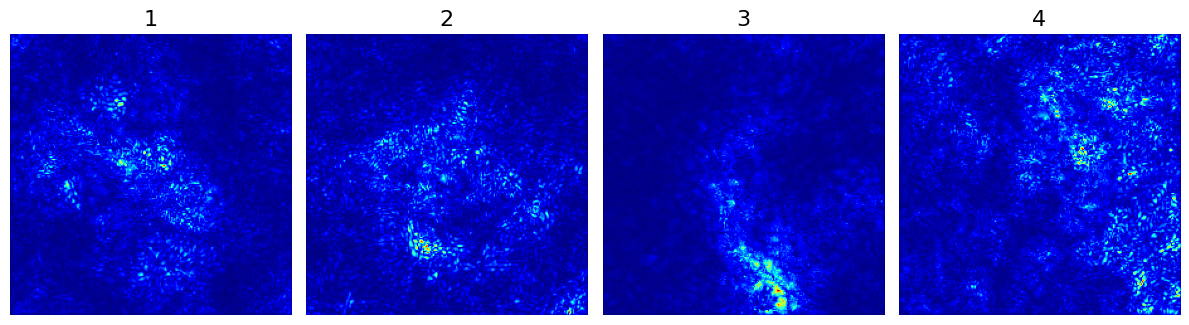

In [49]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True) # Создаем объект Saliency для вычисления карты значимости
mapList = saliency(score, X) # Вычисляем карты значимости для заданных входных данных X с использованием заданного объекта score
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4)) # Отображаем карты значимости
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

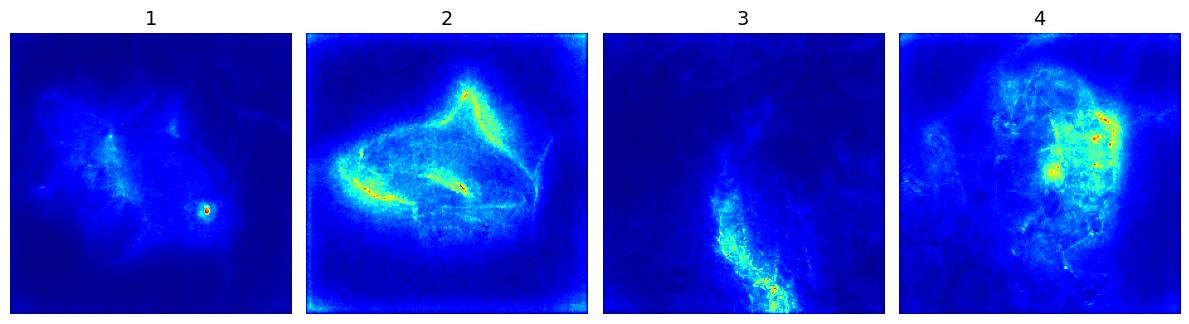

In [50]:
mapList = saliency(score, X, smooth_samples=90, smooth_noise=0.25) # Добавляем параметры для сглаживания
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4)) # Отображаем
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

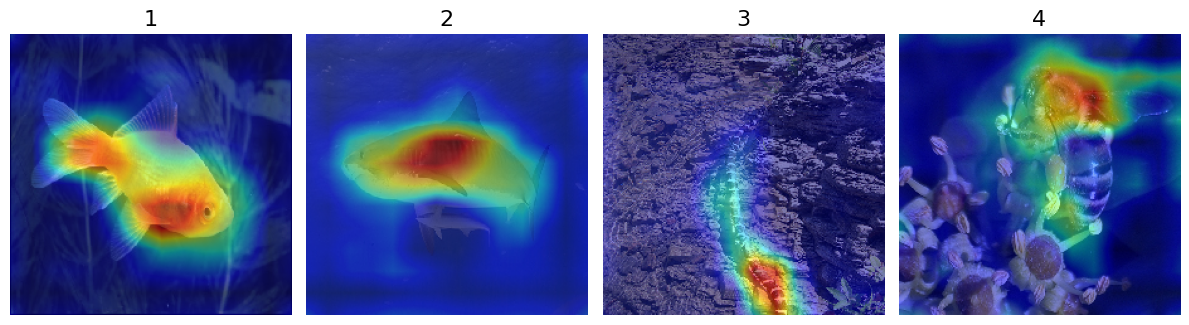

In [55]:
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True) # Создаем объект Gradcam для вычисления карт Grad-CAM
mapList = gradcam(score, X, penultimate_layer=-1) # Вычисляем карты Grad-CAM для заданных входных данных X, указывая предпоследний слой
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4)) # Визуализируем
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet'
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)  # Применяем цветовую карту и масштабируем значения
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

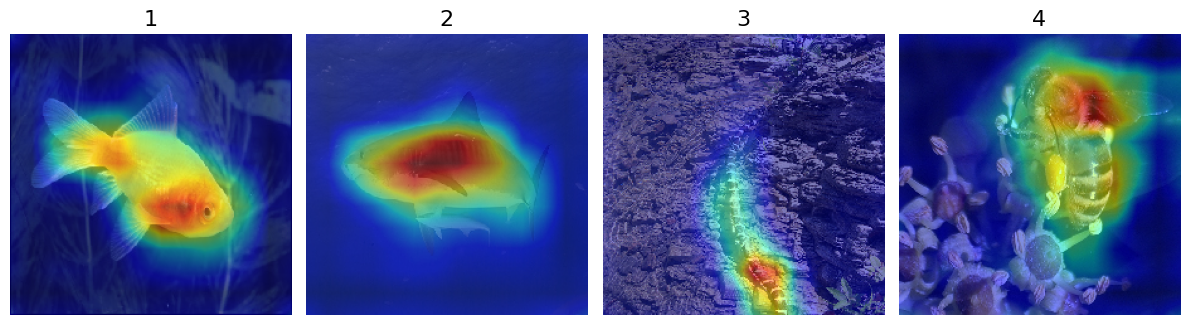

In [52]:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True) # Создаем объект GradcamPlusPlus для вычисления карт Grad-CAM++
mapList = gradcam(score, X, penultimate_layer=-1)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4)) # Визуализируем
for i, title in enumerate(imgTitleList):
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()